In [18]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('../database/clean_train_data_v2.csv', index_col = 0)

In [20]:
df.head()

,LATITUDE,LONGITUDE,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPresentWeatherType,HourlyPressureTendency,HourlyRelativeHumidity,HourlySkyConditions,...,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,YEAR,MONTH,DAY,HOUR,MINUTES,SECONDS,TARGETS
0,26.760594,80.889339,124.96,NaN,61.0,100.0,||HZ,9.0,27.0,FEW:01 98,...,NaN,90.0,10.0,2013,5,5,11,30,0,2.49
1,26.760594,80.889339,124.96,30.06,55.0,61.0,NaN,NaN,83.0,SCT:04 20 SCT:04 100,...,NaN,NaN,2.0,2019,1,23,22,0,0,1.24
2,25.160219,75.845631,273.10,NaN,51.0,67.0,NaN,9.0,57.0,NaN,...,NaN,230.0,5.0,2005,2,17,8,30,0,2.49
3,26.760594,80.889339,124.96,NaN,41.0,94.0,||DU,9.0,16.0,NaN,...,NaN,0.0,0.0,1984,5,20,8,30,0,2.49
4,25.033333,88.133333,31.00,NaN,55.0,82.0,NaN,9.0,39.0,NaN,...,NaN,320.0,2.0,2016,11,16,11,30,0,2.49


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934807 entries, 0 to 934806
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LATITUDE                   934807 non-null  float64
 1   LONGITUDE                  934807 non-null  float64
 2   ELEVATION                  934807 non-null  float64
 3   HourlyAltimeterSetting     217039 non-null  float64
 4   HourlyDewPointTemperature  916829 non-null  float64
 5   HourlyDryBulbTemperature   923010 non-null  float64
 6   HourlyPresentWeatherType   398691 non-null  object 
 7   HourlyPressureTendency     586427 non-null  float64
 8   HourlyRelativeHumidity     916208 non-null  float64
 9   HourlySkyConditions        507788 non-null  object 
 10  HourlySeaLevelPressure     670809 non-null  float64
 11  HourlyStationPressure      24403 non-null   float64
 12  HourlyWetBulbTemperature   24222 non-null   float64
 13  HourlyWindDirection        86

In [22]:
df.SECONDS.value_counts()

0    934807
Name: SECONDS, dtype: int64

In [23]:
df.drop(['SECONDS'], axis = 1, inplace = True)

In [24]:
df.sort_values(['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES'], inplace = True)

In [25]:
df.head()

,LATITUDE,LONGITUDE,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPresentWeatherType,HourlyPressureTendency,HourlyRelativeHumidity,HourlySkyConditions,...,HourlyStationPressure,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,YEAR,MONTH,DAY,HOUR,MINUTES,TARGETS
118582,27.155831,77.960892,167.94,NaN,NaN,NaN,NaN,NaN,NaN,FEW:02 15 FEW:01,...,NaN,NaN,113.0,3.0,1942,8,24,7,30,99.42
755013,27.155831,77.960892,167.94,NaN,NaN,NaN,NaN,NaN,NaN,FEW:02 15 FEW:01,...,NaN,NaN,113.0,8.0,1942,8,24,8,30,99.42
824694,27.155831,77.960892,167.94,NaN,NaN,NaN,NaN,NaN,NaN,FEW:02 15 FEW:01,...,NaN,NaN,135.0,8.0,1942,8,24,9,30,99.42
830375,27.155831,77.960892,167.94,NaN,NaN,NaN,NaN,NaN,NaN,SCT:04 15,...,NaN,NaN,135.0,9.0,1942,8,24,10,30,99.42
680093,27.155831,77.960892,167.94,NaN,NaN,NaN,NaN,NaN,NaN,BKN:06 FEW:01,...,NaN,NaN,135.0,8.0,1942,8,24,11,30,99.42


### Initaial try for interpolation and ml

In [102]:
def fill_interpolate_temporal(date_sorted_data):
    i = 0
    t = 0
    while (i < len(date_sorted_data)):
        prev_val = date_sorted_data[i]
        j = i+1
        while np.isnan(date_sorted_data[j]):
            j = j+1
        next_val = date_sorted_data[j]
        if np.isnan(prev_val):
            for k in range(i, j):
                date_sorted_data[k] = next_val
        else:
            delta = (next_val - prev_val) / (j - i)
            for k in range(i, j):
                date_sorted_data[k] = prev_val + (k - i)*delta
        i = j
        t = t+1
        if (t%10000==0):
            print(t)
    return date_sorted_data

In [110]:
df.HourlyDryBulbTemperature[0:60000].isnull().sum()

0

In [104]:
fill_interpolate_temporal(df.HourlyDryBulbTemperature).isnull().sum()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000


KeyError: 934807

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934807 entries, 0 to 934806
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LATITUDE                   934807 non-null  float64
 1   LONGITUDE                  934807 non-null  float64
 2   ELEVATION                  934807 non-null  float64
 3   HourlyAltimeterSetting     217039 non-null  float64
 4   HourlyDewPointTemperature  916829 non-null  float64
 5   HourlyDryBulbTemperature   923010 non-null  float64
 6   HourlyPresentWeatherType   398691 non-null  object 
 7   HourlyPressureTendency     586427 non-null  float64
 8   HourlyRelativeHumidity     916208 non-null  float64
 9   HourlySkyConditions        507788 non-null  object 
 10  HourlySeaLevelPressure     670809 non-null  float64
 11  HourlyStationPressure      24403 non-null   float64
 12  HourlyWetBulbTemperature   24222 non-null   float64
 13  HourlyWindDirection        86

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [122]:
X = df[['LATITUDE', 'LONGITUDE', 'ELEVATION', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES']]
y = df['TARGETS']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [123]:
y_pred = lr.predict(X_test)

In [124]:
r2_score(y_pred, y_test)

-4.963015335921075

In [127]:
mean_squared_error(y_pred, y_test)

75.80544463149002

In [129]:
df.LATITUDE.value_counts()

26.760594    315313
23.287828    119271
26.739708    101532
25.160219    100011
27.155831     86740
28.000000     50678
25.233333     36070
27.566667     21667
28.250000     16416
27.050000     14668
32.666667     13673
25.033333     13428
27.333333      6697
27.616667      6063
24.466667      5456
27.883333      4201
25.983333      3100
26.516667      3079
27.066667      3020
25.166667      2979
23.316667      2936
24.266667      2781
34.433333      1949
25.666667      1547
27.900000      1484
30.400000        20
25.750000        11
29.850000        10
28.416667         3
31.333333         3
28.633333         1
Name: LATITUDE, dtype: int64

### try ends

In [26]:
cols = ['HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPressureTendency', 
       'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyWetBulbTemperature', 
       'HourlyWindDirection', 'HourlyWindSpeed']

In [27]:
type(cols)

list

In [28]:
# count = 0
for col in tqdm(cols):
    df[col] = df[col].interpolate()
#     count += 1
#     print(count)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.50it/s]


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934807 entries, 118582 to 893344
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LATITUDE                   934807 non-null  float64
 1   LONGITUDE                  934807 non-null  float64
 2   ELEVATION                  934807 non-null  float64
 3   HourlyAltimeterSetting     819252 non-null  float64
 4   HourlyDewPointTemperature  934801 non-null  float64
 5   HourlyDryBulbTemperature   934801 non-null  float64
 6   HourlyPresentWeatherType   398691 non-null  object 
 7   HourlyPressureTendency     934253 non-null  float64
 8   HourlyRelativeHumidity     934801 non-null  float64
 9   HourlySkyConditions        507788 non-null  object 
 10  HourlySeaLevelPressure     934801 non-null  float64
 11  HourlyStationPressure      900745 non-null  float64
 12  HourlyWetBulbTemperature   900745 non-null  float64
 13  HourlyWindDirection     

In [30]:
df.corr()

,LATITUDE,LONGITUDE,ELEVATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,YEAR,MONTH,DAY,HOUR,MINUTES,TARGETS
LATITUDE,1.000000,0.364563,0.236674,0.015038,-0.061365,-0.122381,-0.024695,0.058821,-0.032052,-0.004166,0.002966,-0.082534,-0.039521,0.029662,-0.000979,-0.000037,-0.023438,-0.137939,0.031737
LONGITUDE,0.364563,1.000000,0.191262,0.035669,0.147097,-0.120719,-0.010368,0.272296,-0.017558,-0.069382,-0.024914,-0.154224,-0.057881,0.128697,0.002353,0.000984,-0.009041,-0.174836,-0.059613
ELEVATION,0.236674,0.191262,1.000000,0.017538,-0.181246,-0.247028,-0.205995,0.075660,0.012618,-0.110891,-0.049629,-0.062715,-0.023596,-0.140581,-0.006107,0.000351,-0.003820,0.107067,0.069197
HourlyAltimeterSetting,0.015038,0.035669,0.017538,1.000000,-0.536634,-0.581840,0.019622,0.006044,0.804045,0.058610,-0.530465,-0.111011,-0.065933,0.146234,-0.019387,0.001575,-0.042252,-0.022980,-0.185577
HourlyDewPointTemperature,-0.061365,0.147097,-0.181246,-0.536634,1.000000,0.465827,0.098995,0.509766,-0.639326,-0.102982,0.558902,-0.058642,0.029240,0.153399,0.250103,0.004482,-0.005130,-0.096848,-0.043892
HourlyDryBulbTemperature,-0.122381,-0.120719,-0.247028,-0.581840,0.465827,1.000000,0.076179,-0.480625,-0.688390,-0.077772,0.483666,0.254791,0.104000,0.055035,0.050260,-0.000304,0.203612,0.000404,0.036801
HourlyPressureTendency,-0.024695,-0.010368,-0.205995,0.019622,0.098995,0.076179,1.000000,0.017220,0.004615,0.052027,0.019465,-0.047441,-0.030249,0.737526,0.011217,-0.002045,-0.001807,-0.170272,-0.296730
HourlyRelativeHumidity,0.058821,0.272296,0.075660,0.006044,0.509766,-0.480625,0.017220,1.000000,-0.002692,-0.027868,0.101660,-0.302801,-0.069216,0.095041,0.194373,0.005568,-0.218188,-0.100496,-0.081081
HourlySeaLevelPressure,-0.032052,-0.017558,0.012618,0.804045,-0.639326,-0.688390,0.004615,-0.002692,1.000000,0.088789,-0.595810,-0.120919,-0.082563,0.006014,-0.032345,0.000816,-0.057855,0.016416,-0.023212
HourlyStationPressure,-0.004166,-0.069382,-0.110891,0.058610,-0.102982,-0.077772,0.052027,-0.027868,0.088789,1.000000,0.010691,-0.010584,-0.002411,-0.005581,-0.078900,-0.004363,-0.013954,-0.054835,0.023851


In [31]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')


# X = [[np.nan, 2], [6, np.nan], [7, 6]]
# print(imp.transform(X))
imp.fit_transform([[1, 2], [np.nan, 3], [6, np.nan]])

array([[1. , 2. ],
       [3.5, 3. ],
       [6. , 2.5]])

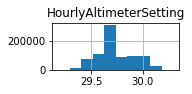

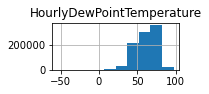

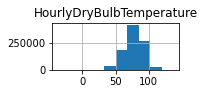

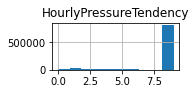

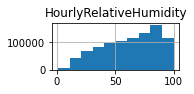

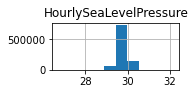

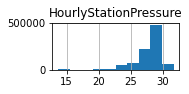

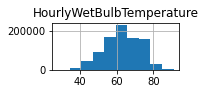

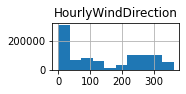

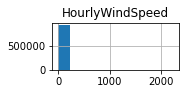

In [36]:
i = 1

    
for col in cols:
    try:
        plt.figure(figsize = (5, 5))
        plt.subplot(5, 2, i)
        plt.title(col)
    #     df[col].hist()
        plt.plot(df[col].hist())
        i += 1
    except:
        pass

In [38]:
mode = ['HourlyPressureTendency', 'HourlyWindSpeed']
median = ['HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyWetBulbTemperature', 
       'HourlyWindDirection']

In [42]:
imp1 = SimpleImputer(missing_values=np.nan, strategy='median')
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# X = [[np.nan, 2], [6, np.nan], [7, 6]]
# print(imp.transform(X))
df[median] = imp1.fit_transform(df[median])
df[mode] = imp2.fit_transform(df[mode])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934807 entries, 118582 to 893344
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LATITUDE                   934807 non-null  float64
 1   LONGITUDE                  934807 non-null  float64
 2   ELEVATION                  934807 non-null  float64
 3   HourlyAltimeterSetting     934807 non-null  float64
 4   HourlyDewPointTemperature  934807 non-null  float64
 5   HourlyDryBulbTemperature   934807 non-null  float64
 6   HourlyPresentWeatherType   398691 non-null  object 
 7   HourlyPressureTendency     934807 non-null  float64
 8   HourlyRelativeHumidity     934807 non-null  float64
 9   HourlySkyConditions        507788 non-null  object 
 10  HourlySeaLevelPressure     934807 non-null  float64
 11  HourlyStationPressure      934807 non-null  float64
 12  HourlyWetBulbTemperature   934807 non-null  float64
 13  HourlyWindDirection     

In [44]:
df.to_csv('../database/clean_train_data_v3.csv')